# HW 4

## Question 1

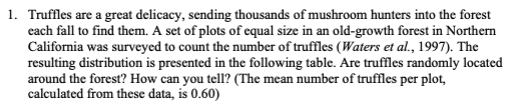

In [1]:
import numpy as np
from scipy.stats import poisson

# data construct
obs_counts = np.array([0, 1, 2, 3, 4])  # I used 4 to present ">3" 
obs_freq = np.array([203, 39, 18, 13, 15])
mean_val = 0.60  

# it should be aligned with Possion Distribution if it is randomly distribution
total_plots = obs_freq.sum()
sample_mean = np.average(obs_counts, weights=obs_freq)
sample_var = np.average((obs_counts - sample_mean)**2, weights=obs_freq)

print(f"sample_mean: {sample_mean:.2f}, sample_var: {sample_var:.2f}")

sample_mean: 0.60, sample_var: 1.26


because the sample var significantly bigger than sample mean, thus it is not following Possion Distribution, and it is not randomly located around the forest.

## Question 2

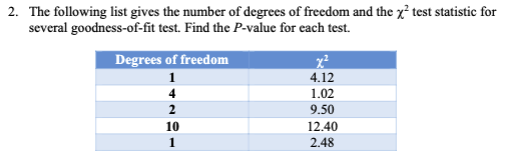

In [2]:
from scipy.stats import chi2

tests = [
    {'df': 1, 'chi2': 4.12},
    {'df': 4, 'chi2': 1.02},
    {'df': 2, 'chi2': 9.50},
    {'df': 10, 'chi2': 12.40},
    {'df': 1, 'chi2': 2.48}
]

for t in tests:
    p_val = 1 - chi2.cdf(t['chi2'], t['df'])
    print(f"degrees of freedom={t['df']}, chi2={t['chi2']:.2f} -> P-value: {p_val:.4f}")

degrees of freedom=1, chi2=4.12 -> P-value: 0.0424
degrees of freedom=4, chi2=1.02 -> P-value: 0.9067
degrees of freedom=2, chi2=9.50 -> P-value: 0.0087
degrees of freedom=10, chi2=12.40 -> P-value: 0.2592
degrees of freedom=1, chi2=2.48 -> P-value: 0.1153


## Question 3

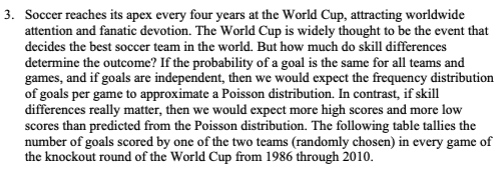
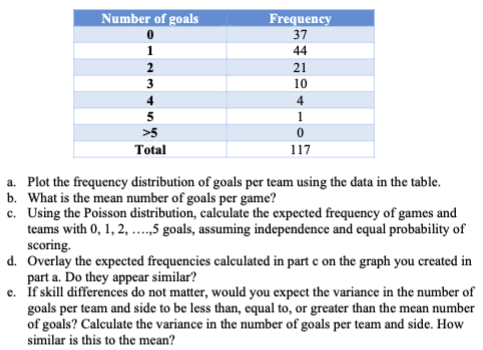

### a)

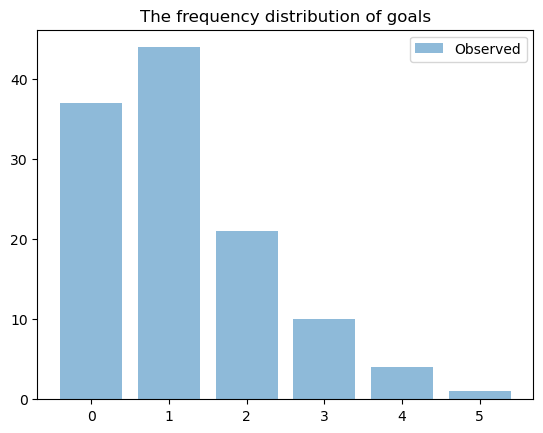

In [3]:
import matplotlib.pyplot as plt

goals = np.array([0, 1, 2, 3, 4, 5])
freq = np.array([37, 44, 21, 10, 4, 1])
total_games = 117

plt.bar(goals, freq, alpha=0.5, label='Observed')
plt.title('The frequency distribution of goals')
plt.legend()
plt.show()

### b)

In [4]:
# b. calculate the mean number of goals
mean_goals = np.average(goals, weights=freq)
print(f'the mean number of goals per game is',mean_goals)

the mean number of goals per game is 1.170940170940171


### c)

In [5]:
# c. the expectation of possion distribution of games
expected_freq = [poisson.pmf(k, mean_goals) * total_games for k in goals]
expected_freq

[36.278807808383,
 42.4803134166536,
 24.8709527268442,
 9.70746587913862,
 2.841715438978613,
 0.6654957523761884]

In [6]:
print("number of goals = 0,",'expected frequency = 36.2788')
print("number of goals = 1,",'expected frequency = 42.4803')
print("number of goals = 2,",'expected frequency = 24.8710')
print("number of goals = 3,",'expected frequency = 9.70747')
print("number of goals = 4,",'expected frequency = 2.8417')
print("number of goals = 5,",'expected frequency = 0.6655')

number of goals = 0, expected frequency = 36.2788
number of goals = 1, expected frequency = 42.4803
number of goals = 2, expected frequency = 24.8710
number of goals = 3, expected frequency = 9.70747
number of goals = 4, expected frequency = 2.8417
number of goals = 5, expected frequency = 0.6655


### d)

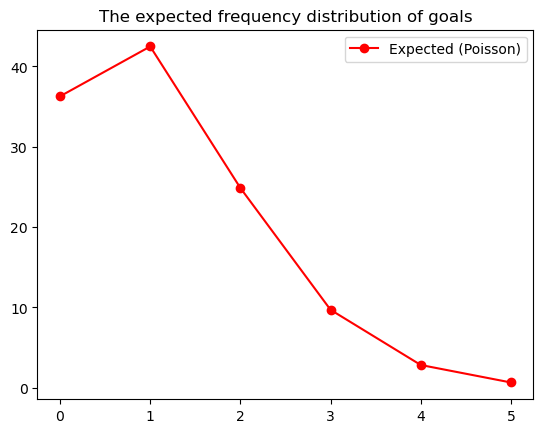

In [7]:
plt.plot(goals, expected_freq, 'ro-', label='Expected (Poisson)')
plt.title('The expected frequency distribution of goals')
plt.legend()
plt.show()

from the above figure, we can see they appear difference.

In [8]:
# e. variance calcualtion
variance_goals = np.average((goals - mean_goals)**2, weights=freq)
print(f"Mean: {mean_goals:.4f}, Variance: {variance_goals:.4f}")

Mean: 1.1709, Variance: 1.2528


## Question 4

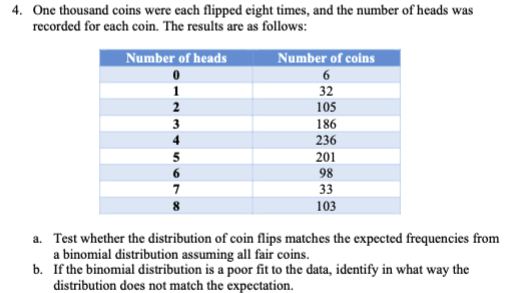

a) & b)

In [9]:
from scipy.stats import binom, chisquare

obs = np.array([6, 32, 105, 186, 236, 201, 98, 33, 103])
exp = np.array([binom.pmf(k, 8, 0.5) * 1000 for k in range(9)])

exp

array([  3.90625,  31.25   , 109.375  , 218.75   , 273.4375 , 218.75   ,
       109.375  ,  31.25   ,   3.90625])

because the X^2 ask for the expection frequency over than 5, we should combine number of head 1 and 2 together,  number of 7 and 8 together

In [10]:
obs_agg = np.array([obs[0]+obs[1], obs[2], obs[3], obs[4], obs[5], obs[6], obs[7]+obs[8]])
exp_agg = np.array([exp[0]+exp[1], exp[2], exp[3], exp[4], exp[5], exp[6], exp[7]+exp[8]])

In [11]:
chi_stat, p_val = chisquare(obs_agg, f_exp=exp_agg)
print(f"Chi2 Stat: {chi_stat:.2f}, P-value: {p_val:.4f}")

Chi2 Stat: 302.32, P-value: 0.0000


According to the X^2 test, we can find the expectation coins are significant different from the observed results(Chi 2= 302.32, and p-value below than 0), and if we compare expectation distrubution with actual distribution, we can also find the theoritical number of heads are very different with actual observation, for example, the therotical number of coins for 8 heads should be 3.9, but the actual accout is 103.

# Question 5

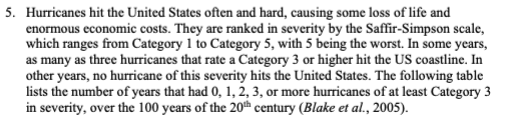
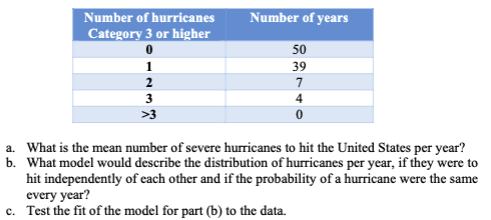

a)

In [12]:
import numpy as np
from scipy.stats import poisson, chi2

hurricane_counts = np.array([0, 1, 2, 3]) 
observed_years = np.array([50, 39, 7, 4])
total_years = 100

mean_h = np.sum(hurricane_counts * observed_years) / total_years
print(f"Mean hurricanes per year: {mean_h:.2f}")

Mean hurricanes per year: 0.65


the mean number of severe hurricanes to hit the unites states is 0.65

b) 
because it is independently hit each year, thus we should utilize the possion distribution

c)

In [13]:
exp_probs = poisson.pmf([0, 1], mean_h)

# we should combine number of 2&3 of category 3 together, because of only 3 years for number of 3
exp_0 = poisson.pmf(0, mean_h) * total_years
exp_1 = poisson.pmf(1, mean_h) * total_years
exp_2_3 = (1 - poisson.cdf(1, mean_h)) * total_years

obs_merged = np.array([50, 39, 7 + 4]) # 0, 1, >=2
exp_merged = np.array([exp_0, exp_1, exp_2_3])

chi_val = np.sum((obs_merged - exp_merged)**2 / exp_merged)
p_hurricane = 1 - chi2.cdf(chi_val, df=1)

print(f"Chi2 Stat: {chi_val:.4f}, P-value: {p_hurricane:.4f}")

Chi2 Stat: 1.4408, P-value: 0.2300


because the X^2 test is 1.4408, and p value is 0.23(>0.1, 0.05, 0.01), thus we cannot reject the H0, and we can conclude the hurricane happened randomly.

# Question 6

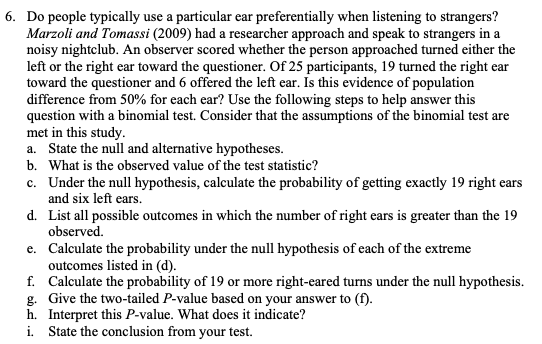

a)

- H0: p=0.5(population difference from 50% for each ear)
- H1: p $\neq$ 0.5(populaion tend to either the left or the right ear)

b)

of 25 participants, 19 turned the right ear toward the questioner

c)

In [14]:
from scipy.stats import binom, binomtest

n = 25
k_obs = 19
p_null = 0.5

p_19 = binom.pmf(19, 25, 0.5)

print(f"Probability of 19 right ears: {p_19:.4f}")

Probability of 19 right ears: 0.0053


d)

possible outcomes in which the number of right ears greater than 19 observed is "20, 21, 22, 23, 24, and 25"

e)

In [15]:
for k in range(20, 26):  # range(20, 26) 包含 20, 21, 22, 23, 24, 25
    prob = binom.pmf(k, n, p_null)
    print(f"  k = {k}: {prob:.6f}")

  k = 20: 0.001583
  k = 21: 0.000377
  k = 22: 0.000069
  k = 23: 0.000009
  k = 24: 0.000001
  k = 25: 0.000000


f)

In [16]:
# P(X >= 19) = 1 - P(X <= 18)
p_19more = 1 - binom.cdf(18, 25, 0.5)
print(f"19 or more (One-sided): {p_19more:.4f}")

19 or more (One-sided): 0.0073


g)

In [17]:
result = binomtest(k_obs, n, p=p_null, alternative='two-sided')
print(f"Two-tailed P-value: {result.pvalue:.4f}(equal to 0.0073*2)")

Two-tailed P-value: 0.0146(equal to 0.0073*2)


h)

if population have no preference of each ear, the probability we observed 19 persons of 25 is only 1.46%.

i)

- if we set up p-value threshold as 0.05, we can reject the H0, and we can conclude the people have ear preference, specifically, people has more likelihood to listen based on right ear.
- if we set up p-value threshodd as 0.01, we cannot reject the H0...

We can find the result depends on the p-value threshold.

# Question 7

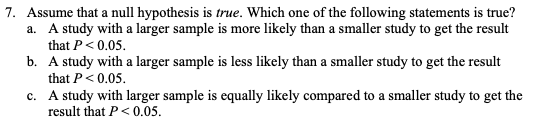

I believed the correct answer is c, because if the null hypothesis is True, which means the no difference exist, and the deviation of data distribution is fully randomly. In that case, the big sample will have the same likelihood to get the same result (P<0.05), only if when H0 is false, the big sample easier to detect the real difference than small samples.

# Question 8

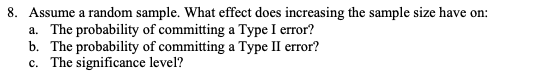

a)

For probability of type I error, i thing there is no any influence, because it is fully depend on the p-value threshold, which is the judgement decison boundary. for example, if we set up P-value = 0.05, which means we would like to undertake 5% risk.

b)

The probability of type II error will decrease as sample size increase, because we may find more evidence of real difference for rejecting H0.

c)

I think the samle size has no influence on significance level, which is a pure subjective value.

# Question 9

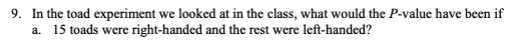
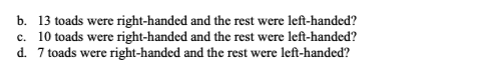
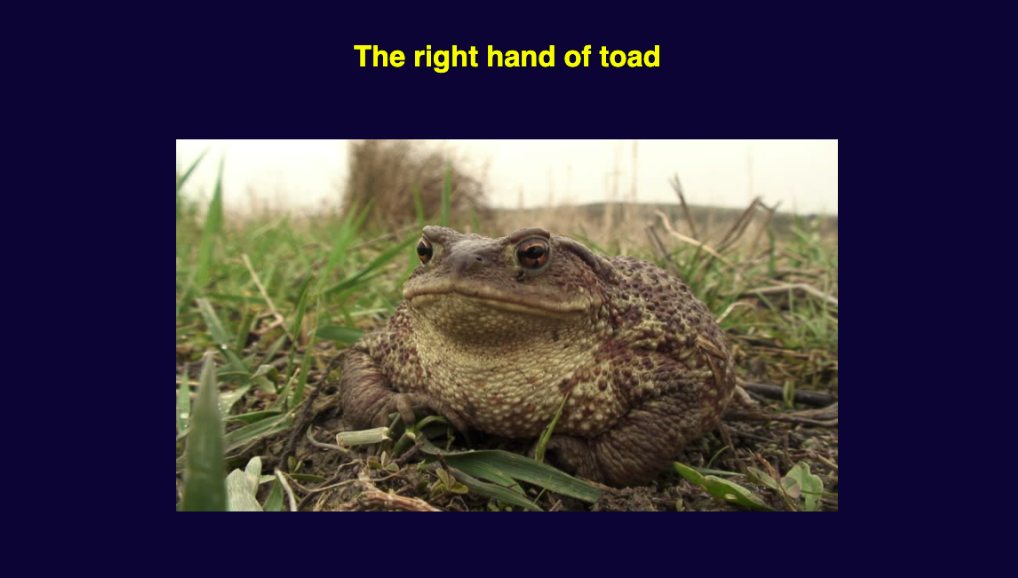
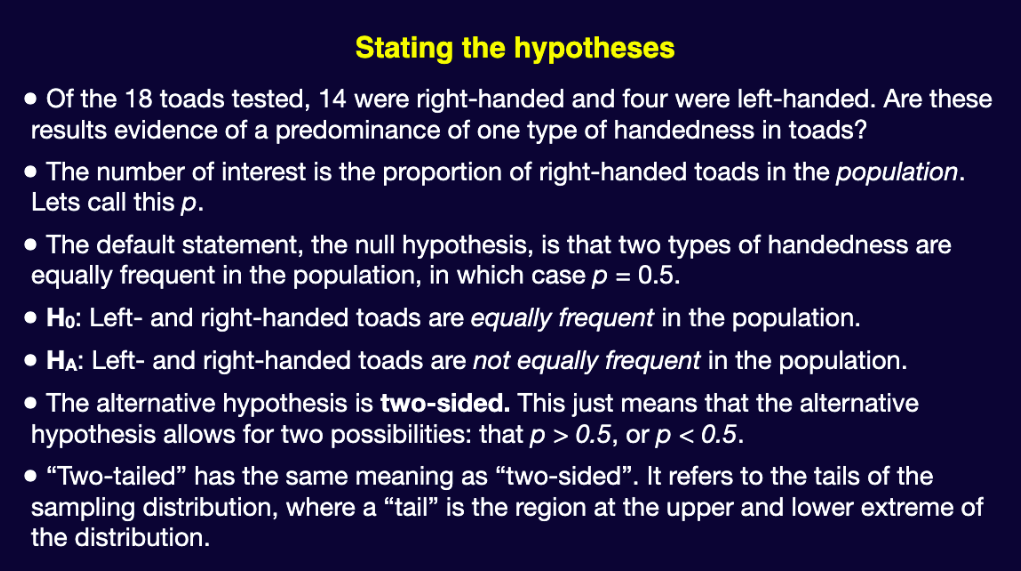

In [18]:
from scipy.stats import binomtest

def get_toad_p(right_count, n=18):
    return binomtest(right_count, n, p=0.5, alternative='two-sided').pvalue

cases = {
    "15 right": 15,
    "13 right": 13,
    "10 right": 10,
    "7 right": 7
}

for label, count in cases.items():
    p_val = get_toad_p(count)
    print(f"{label}: P-value = {p_val:.4f}")

15 right: P-value = 0.0075
13 right: P-value = 0.0963
10 right: P-value = 0.8145
7 right: P-value = 0.4807
